In [3]:
!nvidia-smi

Wed Oct  2 22:02:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### PIZZA & STEAK

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM,Dropout

#### Architecture of a CNN (Convolutional Neural Network..)

```
-- Input images: Target images you would like to discover patterns in

-- Input Layer : Takes in target images and preprocess them for further layers.

{
Eg : tf.keras.layers.Conv2D(filters=10,
kernel_size = 3,
activation = "relu",
input_shape = (224,224,3)),
}

(
where the input_shape = [batch_size,image_height,color_channel]
)


-- Convolutional Layers : Extract/learns the most important features from target images.

here convXD: is something you could use as you want for example Conv1D can be used for 1D data eg tabular data, 2D is probably for Image data...and 3D is for 3 dimension data ..

{
  Eg: tf.keras.layers.Conv2D(10,3,activation="relu")
}


(it is same as the above input layer just it has not gotten the input_shape in here...)



-- Hidden activation : Adds non-linearity to learned features (non-straight lines)

Eg Relu as our activation data for learning patterns non linear features...

-- Pooling layers : **Reduces the dimensionality of learned images features.**


Eg: {
  tf.keras.layers.MaxPool2D (pool_size=2,
  padding="valid")

} you can also use AvgPool2D layer in here..

-- Fully connected layers : Further refines learned features from convolutional layers.

-- Output Layers: Takes learned features and outputs them in shape of target labels.

-- Output activation : Adds non-linearities to output layers.

```

#### Let's deploy some data for our project experiment

In [5]:
!pip install kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sujalthakkar","key":"f1c0c5709adf673907dc35bf54027e00"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#!kaggle datasets download -d dansbecker/food-101

In [9]:
#!unzip food-101.zip

In [10]:
!kaggle datasets download -d siddheshbharapte/pizza-steak

Dataset URL: https://www.kaggle.com/datasets/siddheshbharapte/pizza-steak
License(s): CC0-1.0
 98% 102M/104M [00:01<00:00, 85.2MB/s] 
100% 104M/104M [00:01<00:00, 71.1MB/s]


In [11]:
!unzip pizza-steak.zip

Archive:  pizza-steak.zip
  inflating: pizza_steak/test/pizza/1001116.jpg  
  inflating: pizza_steak/test/pizza/1032754.jpg  
  inflating: pizza_steak/test/pizza/103708.jpg  
  inflating: pizza_steak/test/pizza/1060407.jpg  
  inflating: pizza_steak/test/pizza/106507.jpg  
  inflating: pizza_steak/test/pizza/1067986.jpg  
  inflating: pizza_steak/test/pizza/1106738.jpg  
  inflating: pizza_steak/test/pizza/1119571.jpg  
  inflating: pizza_steak/test/pizza/11297.jpg  
  inflating: pizza_steak/test/pizza/1152100.jpg  
  inflating: pizza_steak/test/pizza/1179703.jpg  
  inflating: pizza_steak/test/pizza/1180001.jpg  
  inflating: pizza_steak/test/pizza/1180273.jpg  
  inflating: pizza_steak/test/pizza/1183595.jpg  
  inflating: pizza_steak/test/pizza/1202689.jpg  
  inflating: pizza_steak/test/pizza/121960.jpg  
  inflating: pizza_steak/test/pizza/1220156.jpg  
  inflating: pizza_steak/test/pizza/1223284.jpg  
  inflating: pizza_steak/test/pizza/1226346.jpg  
  inflating: pizza_steak/test

#### Inspect the data ...

In [12]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [13]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct  2 22:22 .
drwxr-xr-x 1 root root 4096 Oct  2 22:22 ..
drwxr-xr-x 4 root root 4096 Oct  2 22:22 test
drwxr-xr-x 4 root root 4096 Oct  2 22:22 train


In [14]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


```
So we did got nearly 1000 data for our pizza and steak splitted into train and test thing...
```

In [15]:
#different way to find out how many images are there in a folderr.....
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

#### Visualize the images ....

In [16]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])

    # Plot the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # Show the image
    plt.show()

    print(f"Image shape: {img.shape}")
    #return img


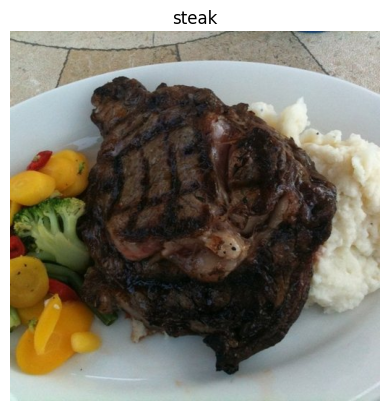

Image shape: (512, 512, 3)


In [18]:
target_dir = "pizza_steak/train/"
target_class= "steak"
view_random_image(target_dir,target_class)

```
So the steak image shape are usually (512x512,3)
```

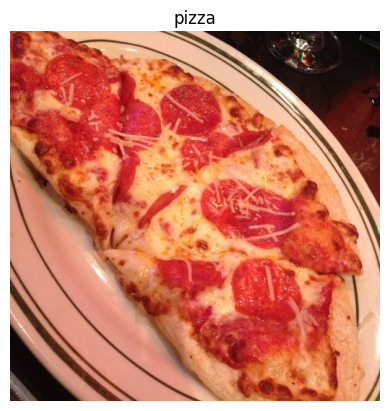

Image shape: (512, 512, 3)


In [19]:
target_class = "pizza"
view_random_image(target_dir,target_class)

```
So we got the pizza image shape of (512,512,3) and some of them has the shape of (512,383,3)

So we really need to make the images same before feeding into the the neural network....
```

```
So we need to preprocess our dataset to make the shape of the images stable/constant let's says (224,224,3)

and also the dtype of the images are uint8 and remember our neural network does not like the input image dtypes as this...it usually like in float32....to better process and find the patters in the images...

Also remember that the 3 color channel  having the different values of those makes the appearance of all other colors
like for example mixing this 3 colors in a way manner that make other color appearance possible

the 3 color channel are....[Red,Green,Blue]
```

```
So before modelling we have few steps to do ..... some of them are mentioned above...

1. Turn all data into numbers (neural networks can't handle images....)
neural networks prefers numerical data whose values are between 0 and 1...

2. Make sure all of your tensors are in the right shape....as discussed above we need to preprocess and make all the images in one shape before feeding into the neural network so before converting to numeric format we need to do this...

3. Scale features (normalize or standardize, neural netowkr tend to prefer normalization...)


```

### Load the images


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(83)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1.255)

#setup path...
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


### Preprocess our images





In [21]:
# import dta from director and turn it into batches...
train_data = train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,
                                            target_size=(224,224), #this is the size we want our all images to be..
                                            class_mode="binary", # 2 classes pizza and steak
                                            seed=83)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=83)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


```
ImageDataGenerator: is a powerful tool that allows you to:

  - preprocess images before feeding them into a model (eg, scaling, rotating, shifting)

  - Augment training data on the fly (random transformations like rotations, flips, zooms, etc...)

  - Ensure the model is exposed to different variations of the input data to improve generalization...


The rescale = 1./255 : this basically rescales the image pixel values to the range [0,1]....because images are usually represented with the pixel values in the range [0,255] which typically represents the intensity levels (0 being black and 255 being white for gray scale images or R/G/B channels in color images...)

And As we know neural network typically perform better when inputs are in smaller normalized ranges, so dividing by 255 convertes pixel value from [0,255] to [0,1]
```

#### Build a CNN model

In [22]:
model_1 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    # another layer
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    # pooling layer....
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),

    #2 more conv2d layers
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    #max pool
    tf.keras.layers.MaxPool2D(2),

    #flatten
    tf.keras.layers.Flatten(),

    #output layer --> dense layer
    tf.keras.layers.Dense(1,activation="sigmoid")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
len(train_data),len(valid_data),1500/32,500/32

(47, 16, 46.875, 15.625)

In [24]:
#compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=1500//32,
                        validation_data=valid_data,
                        validation_steps=500//32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - accuracy: 0.6229 - loss: 0.6632 - val_accuracy: 0.6938 - val_loss: 111.5000
Epoch 2/10
 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8438 - loss: 0.3555

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8438 - loss: 0.3555 - val_accuracy: 0.6500 - val_loss: 118.9134
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.7543 - loss: 0.5260 - val_accuracy: 0.7437 - val_loss: 102.8261
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6875 - loss: 0.6580 - val_accuracy: 0.8000 - val_loss: 49.1736
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.7943 - loss: 0.4323 - val_accuracy: 0.8000 - val_loss: 49.5947
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7812 - loss: 0.4311 - val_accuracy: 0.7500 - val_loss: 87.4032
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.8476 - loss: 0.3802 - val_accuracy: 0.8083 - val_loss: 50.3453
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8438 - loss: 0.3159 - val_accuracy: 0.5500 - val_loss: 176.5951
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8515 - loss: 0.3489 - val_accuracy: 0.7563

In [25]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,204 (242.99 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,103 (121.50 KB)

### Binary classification Let's break it down :

```
1) Become one with the data (visualize, visualize, visualize)
2) Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)

3) Create a model (start with a baseline)


4) Fit the model

5) Evaluate the model

6) Adjust different parameters and improve the model (try to be beat our baseline)

7) Repeat until satisfied (experiment, experiment, experiment)



```

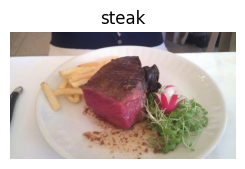

Image shape: (289, 512, 3)


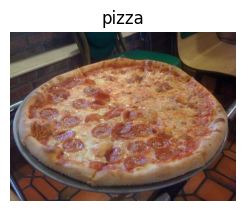

Image shape: (384, 512, 3)


In [26]:
### Visualize the data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


#### Preprocess the data to get feed into the deep learning model....

In [27]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#turn our data in form of batches.....

```
Rather then looking at the all 10k data at one time, our model may only look at the given batch_size size.....


It's like feeding step by step things not feeding all at once, if not the learning of the model will be blury...
```

In [28]:
## Create train and test data generator, and rescale the data....
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
#dividing the pixcel value by 255, so to convert them between [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)



### Load in our images data from directories and turn them into batches...
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=83)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=83)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
## get a sample of training data batch....
images,labels = next(train_data) #previous version --> train_data.next()
len(images),len(labels)

(32, 32)

In [30]:
len(train_data)

47

In [31]:
1500//32

46

In [32]:
#### Let's get the first 2 images....
images[7], images[7].shape

(array([[[0.34117648, 0.30588236, 0.30980393],
         [0.34509805, 0.30980393, 0.3137255 ],
         [0.34509805, 0.30980393, 0.3137255 ],
         ...,
         [0.25882354, 0.14509805, 0.12156864],
         [0.24705884, 0.13333334, 0.10980393],
         [0.2627451 , 0.14901961, 0.1254902 ]],
 
        [[0.34509805, 0.30980393, 0.3137255 ],
         [0.3529412 , 0.31764707, 0.32156864],
         [0.3529412 , 0.31764707, 0.32156864],
         ...,
         [0.21176472, 0.1137255 , 0.09411766],
         [0.20784315, 0.10980393, 0.09019608],
         [0.21568629, 0.11764707, 0.09803922]],
 
        [[0.34901962, 0.3137255 , 0.3254902 ],
         [0.3529412 , 0.31764707, 0.32941177],
         [0.34901962, 0.3137255 , 0.3254902 ],
         ...,
         [0.1764706 , 0.09411766, 0.07450981],
         [0.18039216, 0.09803922, 0.07843138],
         [0.17254902, 0.09019608, 0.07058824]],
 
        ...,
 
        [[0.854902  , 0.8235295 , 0.81568635],
         [0.854902  , 0.8235295 , 0.81568

````
We can witness that the pixcel value is been normalized in form of between [0,1]

and also shape of the images are been  changed to (224,224,3)
````

In [33]:
labels #[0 and 1] for our 2 class steak and pizza....

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

### CREATE A CNN MODEL

```
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline model

```

#### Model_4

```
What does each small things does in the CONV2D layer....

1) Filters : Decides how many filters should pass over an input tensor (eg. Sliding windowws over an image).
usually the values are 10,32,64,128 ....higher the value leads to more complex models....


2) Kernel Size (also called filter size):  Determines the shape of the filters (sliding windows over the output)...
Usually the value in here are 3,5,7...(lower the value easier to learn small features and higher the  value its easier to learn large features..)


3) Padding : Pads the target tensors with zeros (if "same") to preserve input shape. Or leave in the target tensor as is (if "valid"), lowering output shape..

4) Strids : The number of steps a filter takes across an image at a time (eg. if  strides = 1, a filter moves across an image 1 pixel at a time...)

```

In [34]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,3,activation="relu"),
    #tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    #tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

model_4.compile(loss="binary_crossentropy",
                optimizer = Adam(learning_rate = 0.001),
                metrics=["accuracy"])

model_4.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │           1,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 109, 109, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 118810)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         118,811 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,781 (491.33 KB)

 Trainable params: 125,781 (491.33 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
1500//32, 500//32

(46, 15)

In [36]:
history_4 = model_4.fit(
    train_data,
    epochs=15,
    steps_per_epoch=1500//32,
    validation_data=test_data,
    validation_steps=500//32
)

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 383ms/step - accuracy: 0.6264 - loss: 0.7975 - val_accuracy: 0.7896 - val_loss: 0.4824
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7188 - loss: 0.5872 - val_accuracy: 0.7000 - val_loss: 0.5203
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7793 - loss: 0.4856 - val_accuracy: 0.8521 - val_loss: 0.3654
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.7500 - loss: 0.4987 - val_accuracy: 0.7500 - val_loss: 0.4425
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.8110 - loss: 0.4001 - val_accuracy: 0.8646 - val_loss: 0.3656
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8125 - loss: 0.4051 - val_accuracy: 0.7500 - val_loss: 0.5336
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8383 - loss: 0.3721 - val_accuracy: 0.8667 - val_loss: 0.3231
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8438 - loss: 0.3026 - val_accuracy: 0.90

In [37]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8532 - loss: 0.3450


[0.37276604771614075, 0.8320000171661377]

In [38]:
model_1.summary(),model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,204 (242.99 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,103 (121.50 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │           1,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 109, 109, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 118810)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         118,811 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377,345 (1.44 MB)

 Trainable params: 125,781 (491.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,564 (982.68 KB)

(None, None)

In [39]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8174 - loss: 0.4279


[0.4715399742126465, 0.8080000281333923]

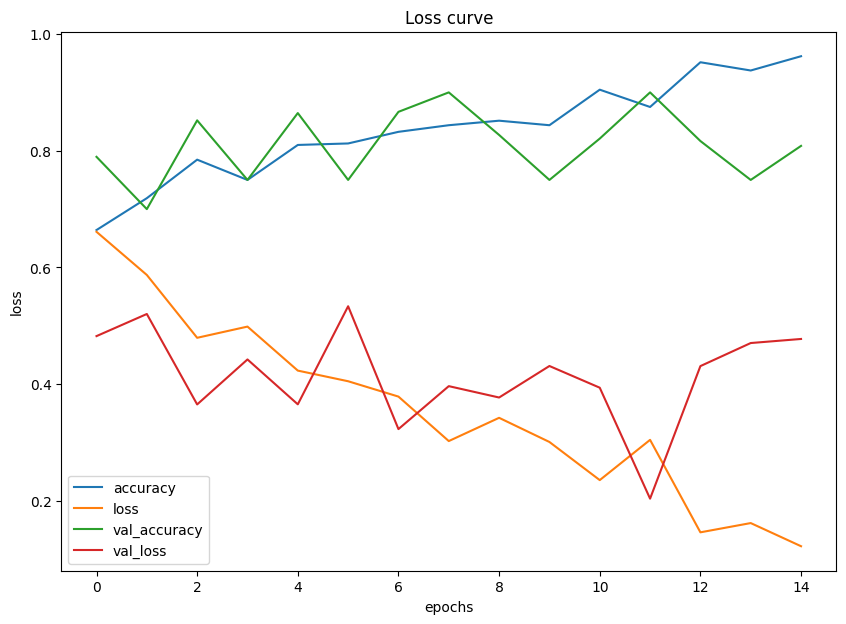

In [40]:
### plotting the loss curve method....

pd.DataFrame(history_4.history).plot(figsize=(10,7))
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss curve")
plt.show();

In [41]:
#plot the validation and training curve here...
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  #accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

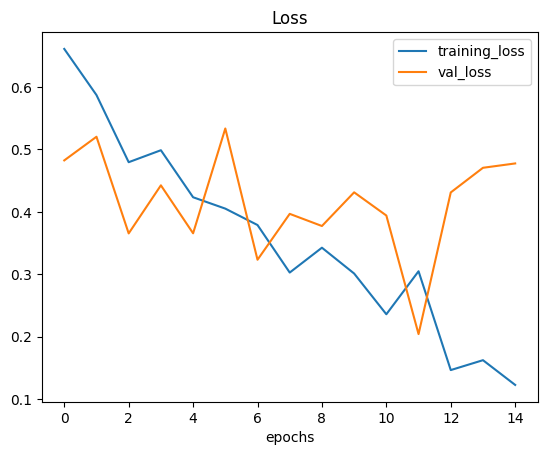

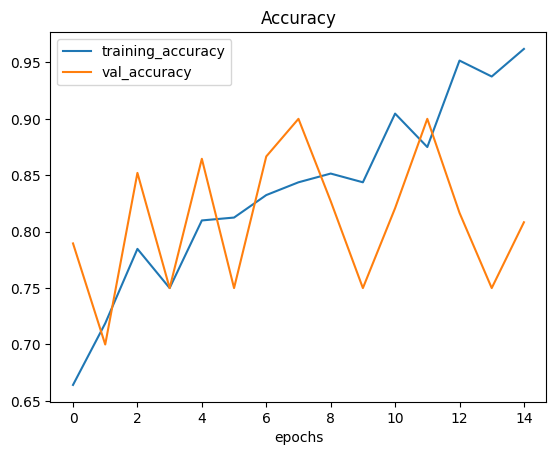

In [42]:
plot_loss_curves(history_4)

```
OVER-FITTING : When ever you do witness that the validation loss is increasing then its starting point then consider your model is overfitting....it is one of the key things to identify overfitting in the model...
```

```
Induce the OVER-FITTING problem :

* Increase the number of COnv layers.
* Increasing the number of hidden units or filters in the conv2D
* Add another dense layer to the output of our flattened layers.

Reduce Overfitting is also known as regularization:

* Add data augmentation
* Add regularization layers (such as MAXPOOL2D)
* Add more data....


```

#### Model 5

In [43]:
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2), #condensing the output
    #so the maxpool layer pick up the most important past
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(learning_rate = 0.0001),
                metrics=["accuracy"])

model_5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

```
    [0  0.09
    0   0.36], that's your matrix
    max pool will pick up the most important value form the matrix
    ie [0.36] out of the whole matrix so the output
    finally get condense....
```
    

In [44]:
history_5=model_5.fit(
    train_data,
    epochs=10,
    steps_per_epoch=1500//32,
    validation_data=test_data,
    validation_steps=500//32
)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - accuracy: 0.4910 - loss: 0.6942 - val_accuracy: 0.5146 - val_loss: 0.6885
Epoch 2/10
 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4688 - loss: 0.7054

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4688 - loss: 0.7054 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5390 - loss: 0.6840 - val_accuracy: 0.6333 - val_loss: 0.6701
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.7812 - loss: 0.6490 - val_accuracy: 0.5500 - val_loss: 0.7002
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.6456 - loss: 0.6609 - val_accuracy: 0.6625 - val_loss: 0.6336
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5625 - loss: 0.6750 - val_accuracy: 0.5500 - val_loss: 0.6714
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.6770 - loss: 0.6249 - val_accuracy: 0.6875 - val_loss: 0.5836
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.5012 - val_accuracy: 0.7500 - val_loss: 0.5843
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.6997 - loss: 0.5751 - val_accuracy: 0.7479 - val_loss

In [45]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8057 - loss: 0.4761


[0.4715399742126465, 0.8080000281333923]

In [46]:
model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.7257 - loss: 0.5614


[0.539111852645874, 0.7360000014305115]

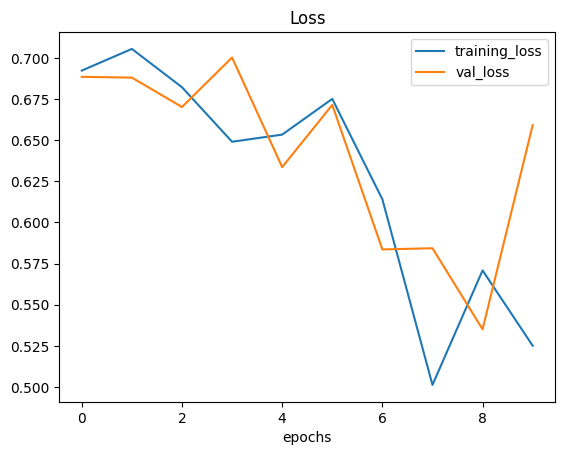

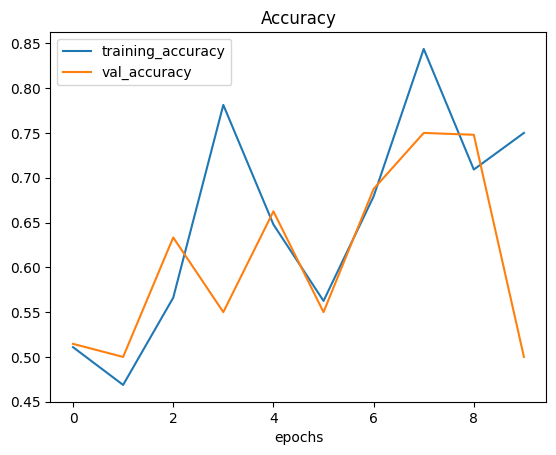

In [47]:
plot_loss_curves(history_5)

#### Data Augmentations....

In [48]:
### Create Image Data Generator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range = 0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True
                                             )



# Creating ImageDataGenerator without data augmentations...

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)




In [49]:
print("Augmented Training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   seed=83,
                                                                   shuffle=False
                                                                   )
# creating non-augmented train data batches...
print("Non-Augmented Train data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = "binary",
                                               seed=83,
                                               shuffle=False
                                               )


print("Non Augmented Test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode = "binary",
                                             seed=83,
                                             shuffle=False
                                             )

Augmented Training data
Found 1500 images belonging to 2 classes.
Non-Augmented Train data
Found 1500 images belonging to 2 classes.
Non Augmented Test data
Found 500 images belonging to 2 classes.


```
REMEMBER :
Data Augmentaion is always happen on the training data.

Not on test data....

```

In [50]:
## lets' look how does the augmented data looks...
images,labels = next(train_data)
len(images),len(labels)

(32, 32)

In [51]:
augmented_images,augmented_labels =next(train_data_augmented)
len(augmented_images),len(augmented_labels)

(32, 32)

Showing image number: 23


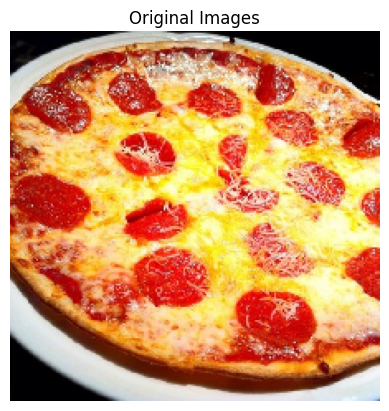

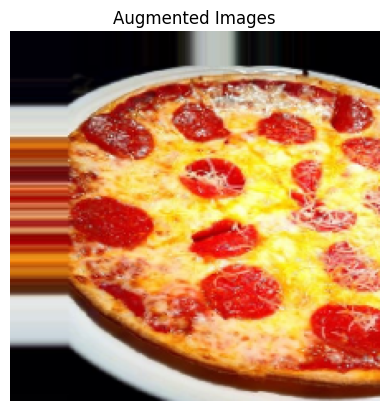

In [52]:
random_number = random.randint(0,32) # picking random int from 0 to 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Images")
plt.axis(False);

#### Model 6 with using augmented data


In [53]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2), #condensing the output
    #so the maxpool layer pick up the most important past
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    #Conv2D(10,3,activation="relu"),
    #MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(learning_rate=0.001),
                metrics =["accuracy"]
                )


model_6.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
len(train_data_augmented),len(test_data),len(train_data)

(47, 16, 47)

In [55]:
1500 // 32 , 500//32

(46, 15)

In [56]:
train_data_augmented.dtype,train_data.dtype

('float32', 'float32')

In [57]:
history_6 =model_6.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=1500//32,
    validation_data=test_data,
    validation_steps=500//32
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 439ms/step - accuracy: 0.4434 - loss: 0.7626 - val_accuracy: 0.6687 - val_loss: 0.6763
Epoch 2/10
 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5312 - loss: 0.6988

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 0.6988 - val_accuracy: 0.9000 - val_loss: 0.6627
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 413ms/step - accuracy: 0.5158 - loss: 0.6951 - val_accuracy: 0.6062 - val_loss: 0.6537
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9688 - loss: 0.5645 - val_accuracy: 0.2000 - val_loss: 0.7713
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 396ms/step - accuracy: 0.5877 - loss: 0.6719 - val_accuracy: 0.5000 - val_loss: 0.6540
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.5115 - val_accuracy: 1.0000 - val_loss: 0.4534
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 393ms/step - accuracy: 0.5107 - loss: 0.6714 - val_accuracy: 0.7688 - val_loss: 0.5414
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9688 - loss: 0.5043 - val_accuracy: 0.9500 - val_loss: 0.3944
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 413ms/step - accuracy: 0.6914 - loss: 0.5970 - val_accuracy: 0.7792 - val

In [58]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8552 - loss: 0.5460


[0.5871142745018005, 0.7639999985694885]

```
the results are not that great based on the above models

```

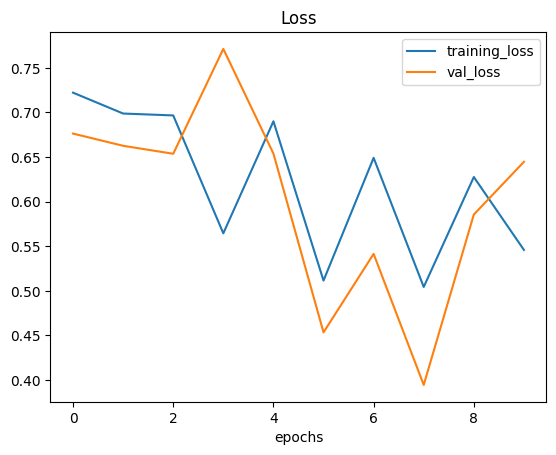

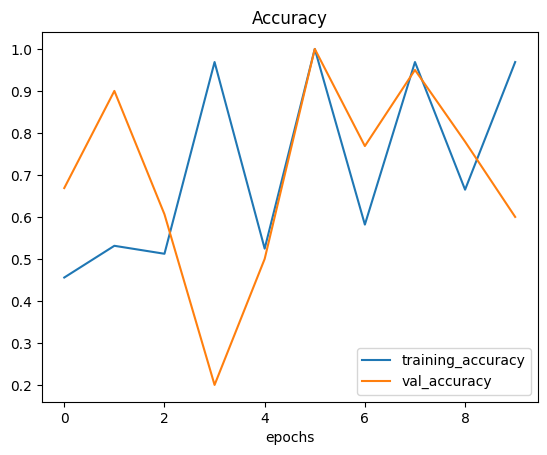

In [59]:
#check the curves...
plot_loss_curves(history_6)

#### Model 7 building the exact same model as model_6 with shuffle=True for train_data_augmented

In [60]:
print("Augmented Training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   seed=83,
                                                                   shuffle=True
                                                                   )
# creating non-augmented train data batches...
print("Non-Augmented Train data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = "binary",
                                               seed=83,
                                               shuffle=False
                                               )


print("Non Augmented Test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode = "binary",
                                             seed=83,
                                             shuffle=False
                                             )

Augmented Training data
Found 1500 images belonging to 2 classes.
Non-Augmented Train data
Found 1500 images belonging to 2 classes.
Non Augmented Test data
Found 500 images belonging to 2 classes.


In [61]:
train_data_augmented.dtype,train_data.dtype

('float32', 'float32')

In [62]:
augmented_images,augmented_labels =next(train_data_augmented)
len(augmented_images),len(augmented_labels)

(32, 32)

Showing image number: 31


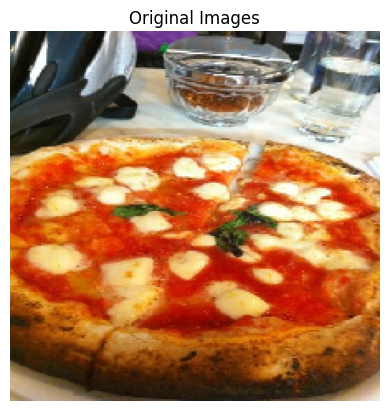

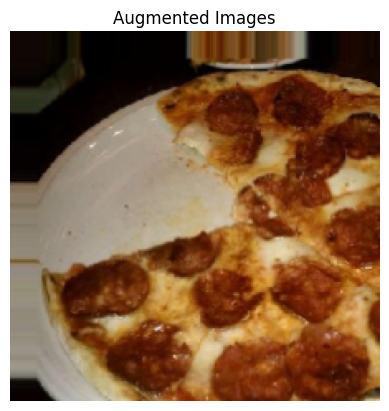

In [63]:
#the data is shuffled so we won't get the exact same original and augmented....
random_number = random.randint(0,32) # picking random int from 0 to 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Images")
plt.axis(False);

In [64]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2), #condensing the output
    #so the maxpool layer pick up the most important past
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    #Conv2D(10,3,activation="relu"),
    #MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(learning_rate=0.001),
                metrics =["accuracy"]
                )


model_7.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history_7 = model_7.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=1500//32,
    validation_data=test_data,
    validation_steps=500//32
)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step - accuracy: 0.5392 - loss: 0.6989 - val_accuracy: 0.7604 - val_loss: 0.5392
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7500 - loss: 0.5568 - val_accuracy: 0.6000 - val_loss: 0.6518
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 409ms/step - accuracy: 0.6853 - loss: 0.5815 - val_accuracy: 0.8125 - val_loss: 0.4179
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6875 - loss: 0.6540 - val_accuracy: 0.8500 - val_loss: 0.5090
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 426ms/step - accuracy: 0.7509 - loss: 0.5295 - val_accuracy: 0.8500 - val_loss: 0.3798
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7812 - loss: 0.5340 - val_accuracy: 0.9000 - val_loss: 0.3146
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 426ms/step - accuracy: 0.7556 - loss: 0.5122 - val_accuracy: 0.8354 - val_loss: 0.3662
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7812 - loss: 0.4880 - val_accuracy: 0.

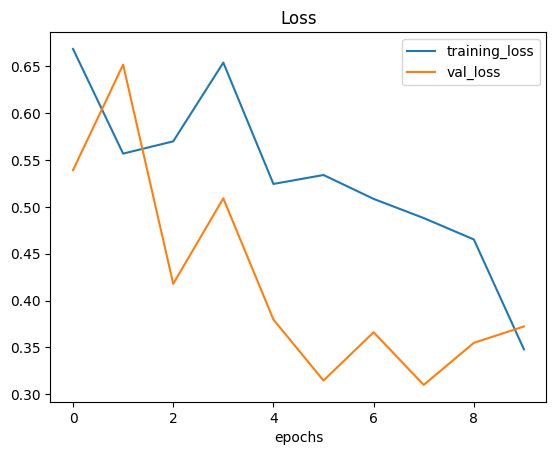

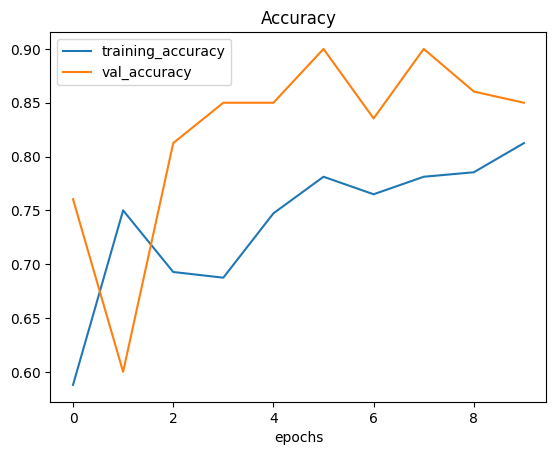

In [66]:
plot_loss_curves(history_7)

#### Results

In [67]:
model_7.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8619 - loss: 0.3049


[0.3376100957393646, 0.8379999995231628]

In [68]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8552 - loss: 0.5460


[0.5871142745018005, 0.7639999985694885]

In [69]:
model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7673 - loss: 0.5091


[0.5391117930412292, 0.7360000014305115]

```
So you can witness that model 5 had the same layers inside but there was no augmented data.....then we added the augmented data to model_6 which improved the accuracy from model_5, then we kept the data same and the layers same just **"SHUFFLED"** the train_augmented data and we did got the accuracy working more then model_6


for future reference:

model_5 : 64%
model_6 : 68%
model_7 : 85%
```
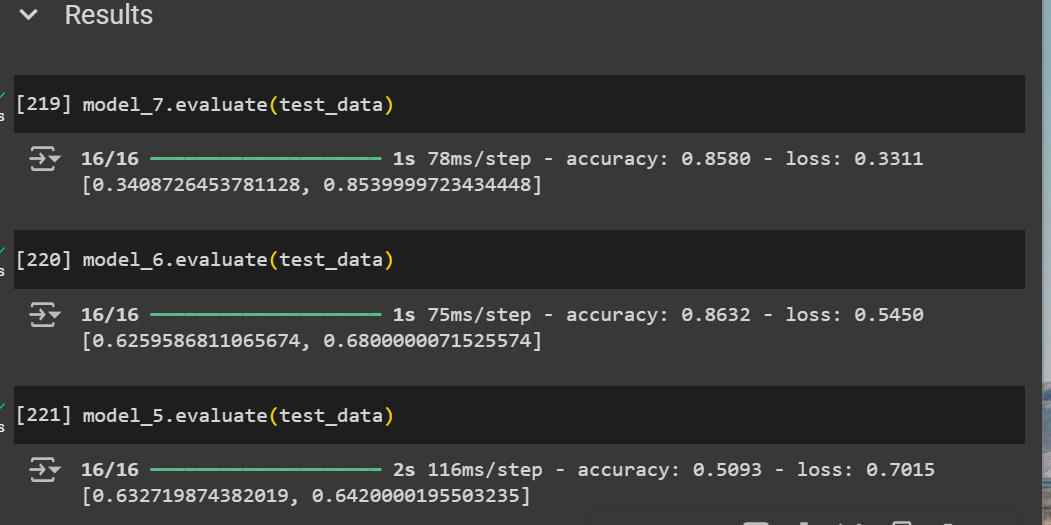

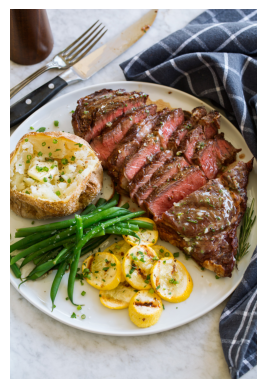

In [71]:
import matplotlib.image as mpimg
img_steak = mpimg.imread("/content/grilled-steak-15.jpg")
plt.imshow(img_steak)
plt.axis("off")
plt.show()

In [73]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image with the desired target size
img_steak = image.load_img("/content/grilled-steak-15.jpg", target_size=(224, 224))

# Convert the image to a NumPy array
img_arr = image.img_to_array(img_steak)

# Expand dimensions to match model input (batch_size, height, width, channels)
img_arr = np.expand_dims(img_arr, axis=0)

# Normalize the image array
img_arr /= 255.0

# Now img_arr can be used as input for your model
print(f"Image shape after preprocessing: {img_arr.shape}")


Image shape after preprocessing: (1, 224, 224, 3)


In [75]:
img_steak = image.load_img("/content/grilled-steak-15.jpg", target_size=(224, 224))
img_arr = image.img_to_array(img_steak)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.0

predict_s = model_7.predict(img_arr)

if predict_s[0][0] > 0.5:
  print("The image is a steak")
else:
  print("The image is not a steak")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The image is a steak


In [79]:
img_piz = image.load_img("/content/side-view-meat-pizza-with-bell-pepper-barbecue-sauce-tray_140725-11449.jpg",target_size=(224,224))
img_arr = image.img_to_array(img_piz)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.0

predict_p = model_7.predict(img_arr)
confidence = predict_p[0][0] * 100
if confidence > 0.5:
  print(f"Prediction: Pizza with {confidence:.2f}% confidence")
else:
  print(f"Prediction: Steak with {100 - confidence:.2f}% confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediction: Pizza with 80.22% confidence


In [80]:
img_piz = image.load_img("/content/p.jpg",target_size=(224,224))
img_arr = image.img_to_array(img_piz)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.0

predict_p = model_7.predict(img_arr)
confidence = predict_p[0][0] * 100
if confidence > 0.5:
  print(f"Prediction: Pizza with {confidence:.2f}% confidence")
else:
  print(f"Prediction: Steak with {100 - confidence:.2f}% confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: Pizza with 11.60% confidence
